In [4]:
import pandas as pd
import folium

file_path = "../../3. Data Cleaning/cleaned_accidents.csv"

# Read the CSV file
data = pd.read_csv(file_path)

# Group the data by 'State' and 'Severity' to get the accident count per state and severity
state_severity_accidents = data.groupby(['State', 'Severity']).size().reset_index(name='Accident_Count')

# Dictionary to store latitude and longitude of state centroids (for marker placement)
state_centroids = {
    'CA': [36.7783, -119.4179],  # California
    'FL': [27.9947, -81.7603],  # Florida
    'VA': [37.4316, -78.6569],  # Virginia
    'TX': [31.9686, -99.9018],  # Texas
    'NY': [40.7128, -74.0060],  # New York
    'PA': [41.2033, -77.1945],  # Pennsylvania
    'NC': [35.7596, -79.0193],  # North Carolina
    'SC': [33.8361, -81.1637],  # South Carolina
    'OR': [43.8041, -120.5542],  # Oregon
    'MN': [46.7296, -94.6859],  # Minnesota
    'AZ': [34.0489, -111.0937],  # Arizona
    'LA': [30.9843, -91.9623],  # Louisiana
    'NJ': [40.0583, -74.4057],  # New Jersey
    'MD': [39.0458, -76.6413],  # Maryland
    'TN': [35.5175, -86.5804],  # Tennessee
    'MI': [44.3148, -85.6024],  # Michigan
    'GA': [33.7490, -84.3880],  # Georgia
    'UT': [40.1135, -111.8636],  # Utah
    'IL': [40.6331, -89.3985],  # Illinois
    'CT': [41.6032, -73.0877],  # Connecticut
    'WA': [47.7511, -120.7401],  # Washington
    'CO': [39.5501, -105.7821],  # Colorado
    'AL': [32.8067, -86.7911],  # Alabama
    'MO': [37.9643, -91.8318],  # Missouri
    'OH': [40.4173, -82.9071],  # Ohio
    'MT': [46.8797, -110.3626],  # Montana
    'IN': [40.2670, -86.1349],  # Indiana
    'AR': [34.7465, -92.2896],  # Arkansas
    'DC': [38.9072, -77.0369],  # District of Columbia
    'IA': [41.8780, -93.0977],  # Iowa
    'ID': [44.0682, -114.7420],  # Idaho
    'WV': [38.5976, -80.4549],  # West Virginia
    'OK': [35.4676, -97.5164],  # Oklahoma
    'KS': [39.0119, -98.4842],  # Kansas
    'MS': [32.3547, -89.3985],  # Mississippi
    'WI': [43.7844, -88.7879],  # Wisconsin
    'MA': [42.4072, -71.3824],  # Massachusetts
    'DE': [38.9108, -75.5277],  # Delaware
    'NV': [38.8026, -116.4194],  # Nevada
    'KY': [37.8393, -84.2700],  # Kentucky
    'NE': [41.1254, -98.2681],  # Nebraska
    'WY': [43.0759, -107.2903],  # Wyoming
    'ND': [47.5515, -101.0020],  # North Dakota
    'ME': [44.2998, -69.4495],  # Maine
    'RI': [41.6809, -71.5118],  # Rhode Island
    'NM': [34.5199, -105.8701],  # New Mexico
    'NH': [43.1939, -71.5724]   # New Hampshire
}

# Create a map centered around the USA
m = folium.Map([37.0902, -95.7129], zoom_start=5)

# Loop through the grouped data to add markers for each state and severity
for _, row in state_severity_accidents.iterrows():
    state = row['State']
    severity = row['Severity']
    accident_count = row['Accident_Count']

    # Use state centroid to place marker (ensure state is in the dictionary)
    if state in state_centroids:
        lat, lon = state_centroids[state]

        # Define color based on severity (assuming 1=low, 2=medium, 3=high)
        if severity == 1:
            marker_color = 'green'
        elif severity == 2:
            marker_color = 'orange'
        else:
            marker_color = 'red'
        
        # Adjust marker size based on accident count
        marker_radius = 10 + (accident_count / 100)  # Adjust radius for visibility

        # Add CircleMarker for state and severity with accident count
        folium.CircleMarker(
            location=[lat, lon],
            radius=marker_radius,
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=f"State: {state_full_names.get(state, state)}<br>Severity: {severity}<br>Accidents: {accident_count}",
            tooltip=f"Severity: {severity}<br>Accidents: {accident_count}"
        ).add_to(m)

# Save to HTML file if needed
m.save('accidents_per_state_severity_map.html')

# Display the map (in Jupyter)
m


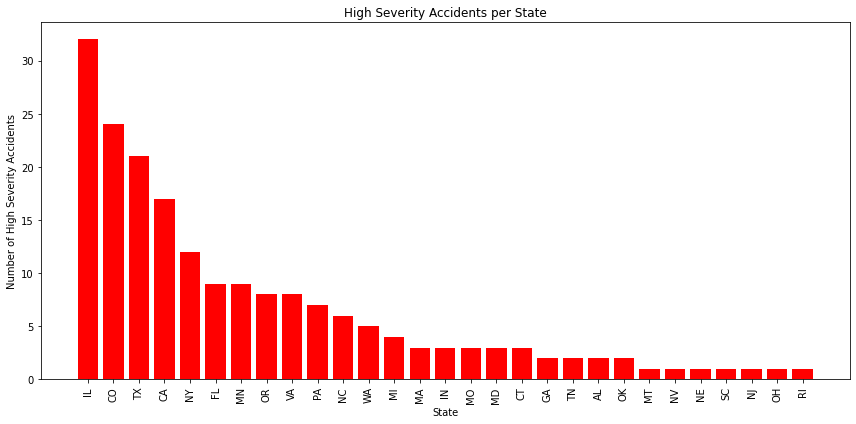

In [6]:
# Filter the data for high severity accidents (Severity == 3)
high_severity_data = data[data['Severity'] == 3]

# Group by state and count the number of high severity accidents
high_severity_per_state = high_severity_data['State'].value_counts().reset_index()
high_severity_per_state.columns = ['State', 'High_Severity_Accidents']

# Sort by the number of high severity accidents for better visualization
high_severity_per_state = high_severity_per_state.sort_values(by='High_Severity_Accidents', ascending=False)

# Plotting the high severity accidents per state
plt.figure(figsize=(12, 6))
plt.bar(high_severity_per_state['State'], high_severity_per_state['High_Severity_Accidents'], color='red')
plt.title('High Severity Accidents per State')
plt.xlabel('State')
plt.ylabel('Number of High Severity Accidents')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()
